In [1]:
## Set date of phenotype data to use
filedate = 'Oct262018'

In [2]:
## Bring in needed mods
import pandas as pd

In [3]:
## set path to phenotype data, should in in the words, "curation_baselined_median21_AUC_Xstrain.csv'
data_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_median21_AUC_Xstrain_noclone.csv'%(
    filedate)

In [4]:
## Bring in phenotype data
phenodf = pd.read_csv(data_path,index_col=0)

In [5]:
## Reset the ined
phenodf.reset_index(inplace=True)

In [6]:
## includes these in drop list
temp = 39
amph = 0.125
todrop = phenodf[(phenodf.temp==temp) & 
                 (phenodf.amphB==amph)].index.tolist()

In [7]:
## Set the temperatures and phenotype data we want to examin
phenodf.drop(todrop,axis=0,inplace=True)

In [8]:
## What is its shape?
phenodf.shape

(1040, 4)

In [9]:
## import needed mods
import numpy as np, scipy.stats as ss

In [10]:
## import needed mods
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
## Set color theme
plt.style.use(['dark_background',
               'tableau-colorblind10'])

In [12]:
## Gathe the unique experimental conditions
uniq_cond = phenodf[['temp',
                     'amphB']
                   ].drop_duplicates().copy()

In [13]:
## reset the index
uniq_cond.reset_index(drop=True,inplace=True)

In [14]:
## look at our great work!
uniq_cond.tail()

temp  amphB
5    37  0.075
6    37  0.125
7    37  0.175
8    38  0.000
9    39  0.000

In [15]:
## Write path to save figure
figsave_path = '../FIGURES/'+data_path.split('/')[-1].split('.csv')[0]+'_correlation.png'

In [16]:
## sort the data by strain
phenodf.sort_values(by='strain',inplace=True)

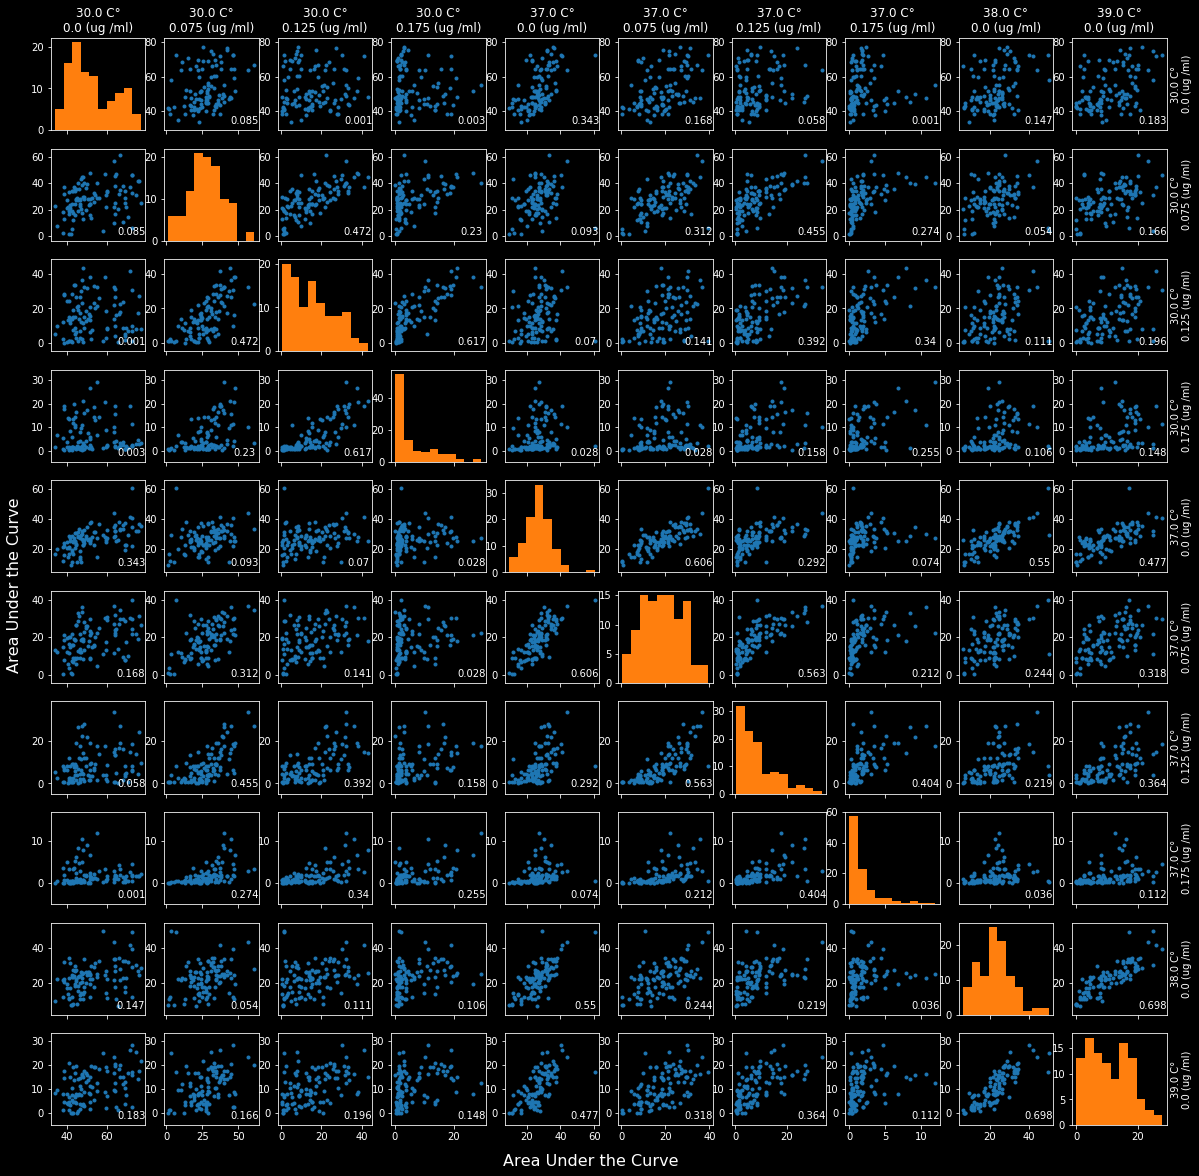

In [21]:
## Plot the conditions against each other!
fig,ax = plt.subplots(uniq_cond.shape[0],uniq_cond.shape[0],
                      figsize=(20,20),
                      sharex = 'col')
for i, row in uniq_cond.iterrows():
    y = phenodf[(phenodf.temp==row.temp) & 
                (phenodf.amphB==row.amphB)]['median_AUC']
    for j, col in uniq_cond.iterrows():
        if i == j:
            plt.sca(ax[i,j])
            plt.hist(y.values,color='tab:orange')
        else:
            x = phenodf[(phenodf.temp==col.temp) & 
                        (phenodf.amphB==col.amphB)]['median_AUC']
            corr = str(np.round(np.corrcoef(x.values,y.values)[0][-1]**2,3))
            plt.sca(ax[i,j])
            plt.plot(x,y,'.',color='tab:blue');
            plt.text(0.85, 0.1,corr, horizontalalignment='center',
                 verticalalignment='center',fontsize=10,color='w',
                 transform = plt.gca().transAxes)
            plt.ylim(np.min(y)-5,np.max(y)+5);
        if i == 0:
            plt.title(u' C°\n'.join([str(a) for a in col]) + u' (ug /ml)')
        if j == len(uniq_cond)-1:
            ax[i,-1].yaxis.set_label_position("right")
            plt.sca(ax[i,-1])
            plt.ylabel(u' C°\n'.join([str(a) for a in row]) + u' (ug /ml)',
                      rotation=90)
fig.text(0.1,0.5,'Area Under the Curve',
         fontsize=16,ha='center',va='center',rotation=90)
fig.text(0.5,0.1,'Area Under the Curve',
         fontsize=16,ha='center',va='center');
fig.savefig(figsave_path,dpi=100,bbox_inches='tight');